# ライブラリーによる回帰分析
## 第１ステップ　参考プログラムによる手順の確認

In [1]:
#データの準備
import numpy as np
import pandas as pd
lst_age = [15.43, 23.01, 5., 12.56, 8.67, 7.31, 9.66, 13.64, 14.92, 18.47, 15.48, 22.13, 10.11, 26.95, 5.68, 21.76]
lst_wgt = [70.43,58.15,37.22,56.51,57.32,40.84,57.79,56.94,63.03,65.69,62.33,64.95,57.73,66.89,46.68,61.08]
lst_hgt = [170.91,160.68,129.,159.7,155.46,140.56,153.65,159.43,164.7,169.65,160.71,173.29,159.31,171.52,138.96,165.87]
ex3_dic = {"年齢":lst_age,"体重":lst_wgt,"身長":lst_hgt}
ex3_df = pd.DataFrame(ex3_dic)
display(ex3_df)

,年齢,体重,身長
0,15.43,70.43,170.91
1,23.01,58.15,160.68
2,5.00,37.22,129.00
3,12.56,56.51,159.70
4,8.67,57.32,155.46
5,7.31,40.84,140.56
6,9.66,57.79,153.65
7,13.64,56.94,159.43
8,14.92,63.03,164.70
9,18.47,65.69,169.65


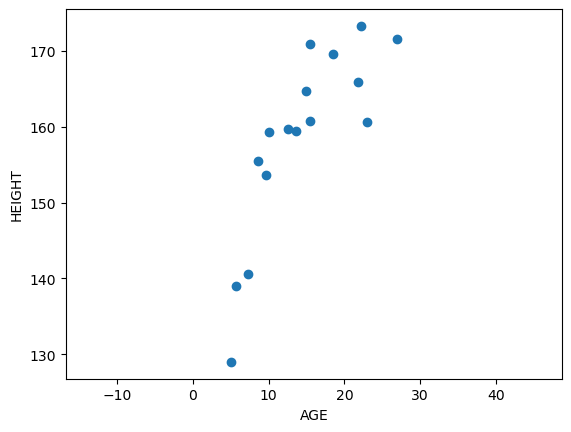

In [2]:
#データのプロット
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal","datalim")

plt.plot(ex3_df["年齢"], ex3_df["身長"], 'o')

plt.xlabel("AGE")
plt.ylabel("HEIGHT")

plt.show()

In [3]:
# 年齢と身長の相関係数  ～0.3未満；殆ど相関無し　0.3以上0.5未満；弱い相関あり　0.5以上0.7未満；相関あり　0.7以上；強い相関あり
import numpy as np
X = ex3_df["年齢"]
Y = ex3_df["身長"]
print(np.corrcoef(X, Y))

[[1.         0.81882321]
 [0.81882321 1.        ]]


In [5]:
# 線形回帰　回帰係数と切片
from sklearn import linear_model
model = linear_model.LinearRegression()
XX = ex3_df["年齢"].to_numpy()
XX_arr = XX.reshape(-1,1)

#model.fit(X[:, np.newaxis], Y) #newaxisの意味は次のセル　warning出る為 4,5,7行の処理
model.fit(XX_arr,Y)
#print(model.coef_, model.intercept_)
print("w0=",model.coef_)
print("w1=",model.intercept_)

w0= [1.55793558]
w1= 135.86622669234973


In [27]:
XX = ex3_df["年齢"].to_numpy()
XX_arr = XX.reshape(-1,1)
print(XX_arr)

[[15.43]
 [23.01]
 [ 5.  ]
 [12.56]
 [ 8.67]
 [ 7.31]
 [ 9.66]
 [13.64]
 [14.92]
 [18.47]
 [15.48]
 [22.13]
 [10.11]
 [26.95]
 [ 5.68]
 [21.76]]


In [16]:
# np.newaxis; １次元配列やベクトルに対して列次元が１の行列にする
# fit(x, y)の x（説明変数）は次元を持つ行列を指定する
print(X)
print(X_arr)
print(X[:,np.newaxis])

0     15.43
1     23.01
2      5.00
3     12.56
4      8.67
5      7.31
6      9.66
7     13.64
8     14.92
9     18.47
10    15.48
11    22.13
12    10.11
13    26.95
14     5.68
15    21.76
Name: 年齢, dtype: float64
[[15.43]
 [23.01]
 [ 5.  ]
 [12.56]
 [ 8.67]
 [ 7.31]
 [ 9.66]
 [13.64]
 [14.92]
 [18.47]
 [15.48]
 [22.13]
 [10.11]
 [26.95]
 [ 5.68]
 [21.76]]
[[15.43]
 [23.01]
 [ 5.  ]
 [12.56]
 [ 8.67]
 [ 7.31]
 [ 9.66]
 [13.64]
 [14.92]
 [18.47]
 [15.48]
 [22.13]
 [10.11]
 [26.95]
 [ 5.68]
 [21.76]]


C:\Users\TOTOMATTER\AppData\Local\Temp\ipykernel_14144\2608260491.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(X[:,np.newaxis])


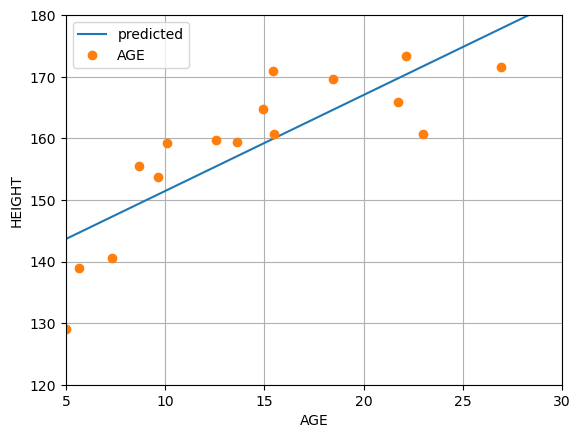

In [6]:
# 回帰直線
xx = np.arange(5,30)
yy = model.predict(xx[:, np.newaxis])
plt.plot(xx, yy, label="predicted")
plt.plot(X, Y, 'o', label="AGE")
plt.xlabel("AGE")
plt.ylabel("HEIGHT")
plt.xlim(5, 30)
plt.ylim(120,180)
plt.grid(True)
plt.legend()

In [7]:
#18歳の身長を予測
print(model.predict([[18]]))

[163.90906711]


In [9]:
#決定係数  R^2 = 予測値 y の偏差平方和　／　データ y の偏差平方和  （予測精度）
#print(model.score(X[:, np.newaxis], Y))
print(model.score(XX_arr, Y))

0.6704714462092404


In [10]:
# 年齢、体重と身長の相関係数
import numpy as np
X = ex3_df["年齢"]
Y = ex3_df["身長"]
z = ex3_df["体重"]

print("年齢",np.corrcoef(X, Y))
print("体重",np.corrcoef(z, Y))
print("-----------------")
print(ex3_df.corr()["身長"])


年齢 [[1.         0.81882321]
 [0.81882321 1.        ]]
体重 [[1.        0.9643214]
 [0.9643214 1.       ]]
-----------------
年齢    0.818823
体重    0.964321
身長    1.000000
Name: 身長, dtype: float64


In [11]:
#モデルの適用
import numpy as np
from sklearn import linear_model
%matplotlib inline

import matplotlib.pyplot as plt

X = ex3_df.iloc[:, :2]
Y = ex3_df["身長"]
model = linear_model.LinearRegression()
model.fit(X, Y)

print('回帰係数(w0, w1):', model.coef_)
print('切片(w2)　:', model.intercept_)
print('決定係数:', model.score(X, Y))


回帰係数(w0, w1): [0.45661227 1.08625893]
切片(w2)　: 89.04849988504863
決定係数: 0.9564365530998984


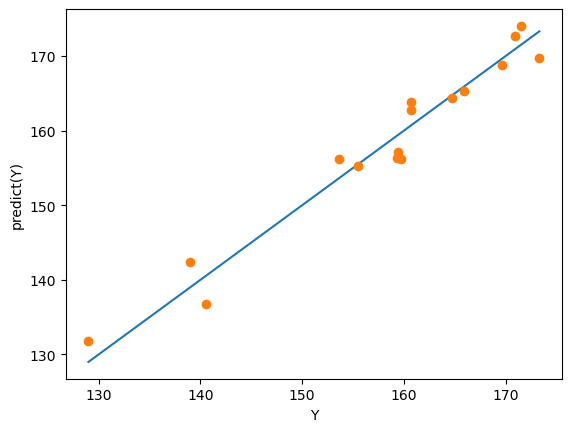

In [12]:
predict = model.predict(X)
plt.plot(np.linspace(min(Y),max(Y)),
         np.linspace(min(Y),max(Y)))
plt.plot(Y, predict, 'o')

plt.xlabel('Y')
plt.ylabel('predict(Y)')
plt.show()

In [13]:
#18歳で体重58.5の身長を予測
predic = {"年齢":[18],"体重":[58.5]}
predf = pd.DataFrame(predic)
print(predf)
xx = predf.iloc[:,0:2]
yy = model.predict(xx)
print(yy)

   年齢    体重
0  18  58.5
[160.81366811]


## 第２ステップ　線形単回帰分析ﾌﾟﾛｸﾞﾗﾑの実装

In [14]:
#　step2_1
import pandas as pd

df_1 = pd.read_csv("test_data_1.csv",usecols=['最高気温','売上数'])

display(df_1)


,最高気温,売上数
0,20,45
1,22,63
2,24,70
3,24,68
4,27,75
5,25,65
6,23,51
7,24,55
8,27,81
9,29,105


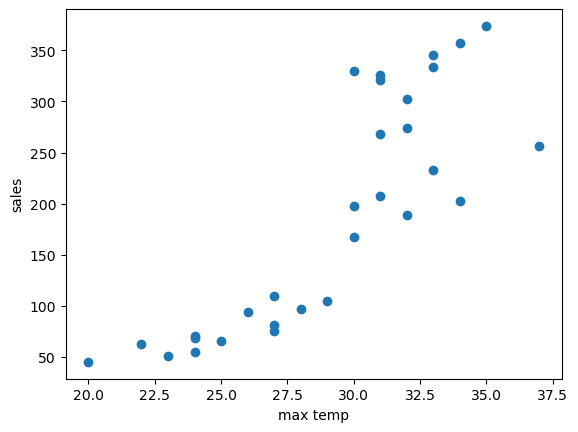

In [15]:
#　step2_2
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(df_1['最高気温'], df_1['売上数'], 'o')
plt.xlabel('max temp')
plt.ylabel('sales')

plt.show()


In [16]:
# step2_3
import numpy as np
X = df_1['最高気温']
Y = df_1['売上数']
print(np.corrcoef(X, Y))


[[1.         0.84371353]
 [0.84371353 1.        ]]


In [17]:
# step2_4
from sklearn import linear_model
model = linear_model.LinearRegression()
XX_2_arr = df_1["最高気温"].to_numpy()
XX_2 = XX_2_arr.reshape(-1,1)
#model.fit(X[:, np.newaxis], Y)
model.fit(XX_2, Y)
#print(X[:, np.newaxis])
#print(Y)

print(model.coef_, model.intercept_)

[22.49473348] -467.2963932333228


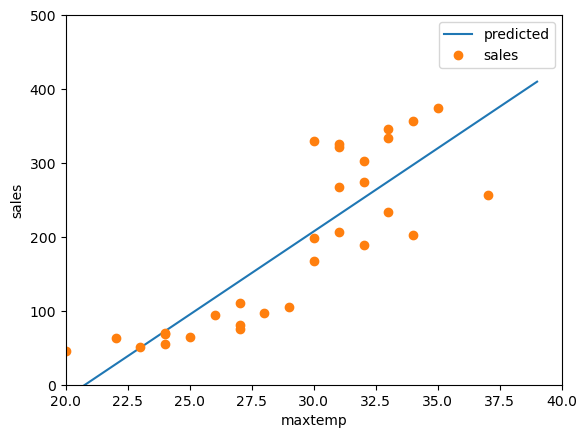

In [18]:
# step2_5
xx = np.arange(20,40)
yy = model.predict(xx[:, np.newaxis])
plt.plot(xx, yy, label='predicted')
plt.plot(X, Y, 'o', label='sales')
plt.xlabel('maxtemp')
plt.ylabel('sales')
plt.xlim(20, 40)
plt.ylim(0,500)
plt.legend()


In [20]:
# step2_6 
# 最高気温36度の時の売り上げ予測
# 決定係数
print(model.predict([[36]]))
print(model.score(XX_2, Y))

[342.51401213]
0.7118525174065935


## 第３ステップ　線形重回帰分析プログラムの実装

In [21]:
# step3_1 
import pandas as pd
df_1 = pd.read_csv("csv2.csv",usecols=['売上高','接客','品揃え','面積','駅距離'])

display(df_1)

,売上高,接客,品揃え,面積,駅距離
0,940,4,4,30,0.3
1,678,3,3,31,3.1
2,868,3,4,35,1.4
3,583,3,3,24,2.6
4,359,2,3,28,3.2
5,910,3,4,24,0.4
6,438,3,2,28,1.7
7,790,4,3,20,4.0
8,504,3,3,32,4.2
9,395,3,3,32,3.5


In [22]:
# step3_2
import numpy as np
from sklearn import linear_model
print(df_1.corr()["売上高"])


売上高    1.000000
接客     0.775675
品揃え    0.780377
面積     0.262909
駅距離   -0.765702
Name: 売上高, dtype: float64


In [23]:
# step3_3
df_2 = df_1.drop('面積', axis=1)
display(df_2)

,売上高,接客,品揃え,駅距離
0,940,4,4,0.3
1,678,3,3,3.1
2,868,3,4,1.4
3,583,3,3,2.6
4,359,2,3,3.2
5,910,3,4,0.4
6,438,3,2,1.7
7,790,4,3,4.0
8,504,3,3,4.2
9,395,3,3,3.5


In [24]:
# step3_4
import numpy as np
from sklearn import linear_model
%matplotlib inline

import matplotlib.pyplot as plt

X = df_2.iloc[:, 1:4]
Y = df_2['売上高']
model = linear_model.LinearRegression()
model.fit(X, Y)

print('回帰係数:', model.coef_)
print('切片　:', model.intercept_)
print('決定係数:', model.score(X, Y))

回帰係数: [133.58036587  80.08500609 -43.56442535]
切片　: 66.38119946937752
決定係数: 0.7990932392049901


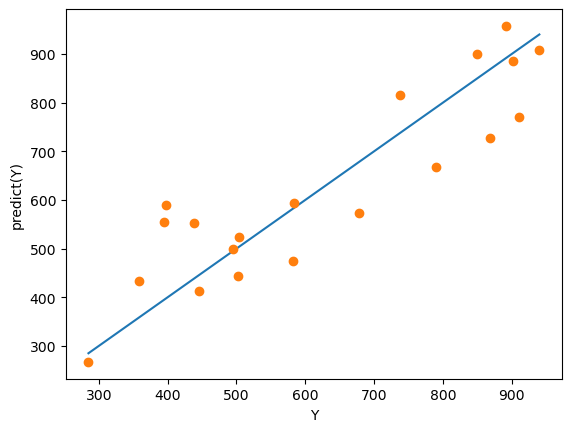

In [25]:
# step3_5
predict = model.predict(X)
plt.plot(np.linspace(min(Y),max(Y)),
         np.linspace(min(Y),max(Y)))
plt.plot(Y, predict, 'o')

plt.xlabel('Y')
plt.ylabel('predict(Y)')
plt.show()

In [26]:
# step3_6
predic = {"接客":[5],"品揃え":[4],"駅距離":[1.5]}
predf = pd.DataFrame(predic)
print(predf)
xx = predf.iloc[:,0:3]
yy = model.predict(xx)
print(yy)

   接客  品揃え  駅距離
0   5    4  1.5
[989.27641513]


## 第４ステップ　プロ野球の勝率推定

In [1]:
# step4_1
# excel_sheet 自動編集 セリーグかパリーグは任意
import numpy as np
import openpyxl as opxl
# input excel_book & sheet
book1 = opxl.load_workbook("プロ野球過去順位.xlsx")
sheet1 = book1["セリーグ"]
# output excel_book & sheet
booknew = opxl.Workbook()
sheetnew = booknew["Sheet"]
sheetnew.title="セ全data"

# title line write
sheetnew["A1"] = "勝率"
sheetnew["B1"] = "得/試"
sheetnew["C1"] = "失/試"
sheetnew["D1"] = "打率"
sheetnew["E1"] = "本/試"
sheetnew["F1"] = "盗/試"
sheetnew["G1"] = "防御率"

# keisan & value_set
k = 1
for i in range(2, 200, 8):
    if sheet1.cell(row=i,column=1).value is None:
        break
    else:
        siaisu =  sheet1.cell(row=i, column=3).value + sheet1.cell(row=i, column=4).value + sheet1.cell(row=i, column=5).value
        for j in range(6):
            l_no = i + j
            k += 1
            aa = sheet1.cell(row=l_no, column=6).value / siaisu
            sheetnew["B"+ str(k)] = np.round(aa, 3)
            bb = sheet1.cell(row=l_no, column=7).value / siaisu
            sheetnew["C"+ str(k)] = np.round(bb, 3)
            cc = sheet1.cell(row=l_no, column=9).value / siaisu
            sheetnew["E"+ str(k)] = np.round(cc, 3)
            dd = sheet1.cell(row=l_no, column=10).value / siaisu
            sheetnew["F"+ str(k)] = np.round(dd, 3)
            sheetnew["A"+ str(k)] = sheet1.cell(row=l_no, column=2).value
            sheetnew["D"+ str(k)] = sheet1.cell(row=l_no, column=8).value
            sheetnew["G"+ str(k)] = sheet1.cell(row=l_no, column=11).value


# close shori
book1.save("プロ野球過去順位.xlsx")
booknew.save("セ全data.xlsx")

In [3]:
# step4_2
import pandas as pd
df_1 = pd.read_csv("セ全data.csv",usecols=["勝率","得/試","失/試","打率","本/試","盗/試","防御率"])

pd.options.display.max_rows = 20
pd.options.display.min_rows = 12

display(df_1)


,勝率,得/試,失/試,打率,本/試,盗/試,防御率
0,0.659,4.514,3.424,0.275,1.264,0.583,2.94
1,0.566,4.201,3.528,0.258,0.944,0.562,3.17
2,0.497,3.806,4.208,0.259,0.806,0.736,3.97
3,0.479,3.806,3.708,0.255,0.736,0.549,3.28
4,0.464,3.667,3.993,0.245,0.701,0.535,3.59
5,0.354,3.451,4.757,0.239,0.889,0.354,4.36
...,...,...,...,...,...,...,...
90,0.566,3.000,2.548,0.238,0.423,0.452,2.23
91,0.553,3.212,2.808,0.240,0.558,0.471,2.55
92,0.514,3.356,3.077,0.234,0.452,0.327,2.42


In [8]:
# step4_3
#説明変数と目的変数、学習データと検証データ　の分離
v_df = df_1.iloc[84:90,:]
df_2 = df_1.iloc[:84,:]
display(v_df)
display(df_2)

,勝率,得/試,失/試,打率,本/試,盗/試,防御率
84,0.616,3.881,2.965,0.247,0.587,0.552,2.66
85,0.532,3.448,3.552,0.246,0.671,0.545,3.20
86,0.529,3.636,3.469,0.247,0.734,0.231,3.16
87,0.504,3.657,3.545,0.252,1.147,0.336,3.39
88,0.407,3.734,3.965,0.239,0.860,0.434,3.66
89,0.406,2.727,3.483,0.234,0.497,0.252,3.08


,勝率,得/試,失/試,打率,本/試,盗/試,防御率
0,0.659,4.514,3.424,0.275,1.264,0.583,2.94
1,0.566,4.201,3.528,0.258,0.944,0.562,3.17
2,0.497,3.806,4.208,0.259,0.806,0.736,3.97
3,0.479,3.806,3.708,0.255,0.736,0.549,3.28
4,0.464,3.667,3.993,0.245,0.701,0.535,3.59
5,0.354,3.451,4.757,0.239,0.889,0.354,4.36
...,...,...,...,...,...,...,...
78,0.576,4.329,3.958,0.250,1.217,0.483,3.52
79,0.518,3.476,3.734,0.251,0.818,0.343,3.48
80,0.489,3.420,2.993,0.243,0.587,0.769,2.67


In [9]:
# step4_4
# 相関係数チェック

print(df_2.corr()["勝率"])

勝率     1.000000
得/試    0.416036
失/試   -0.519736
打率     0.397054
本/試    0.349791
盗/試    0.375765
防御率   -0.542094
Name: 勝率, dtype: float64


In [12]:
# step4_5
df_3 = df_2.drop('本/試', axis=1)
df_4 = df_3.drop("盗/試", axis=1)
display(df_4)

,勝率,得/試,失/試,打率,防御率
0,0.659,4.514,3.424,0.275,2.94
1,0.566,4.201,3.528,0.258,3.17
2,0.497,3.806,4.208,0.259,3.97
3,0.479,3.806,3.708,0.255,3.28
4,0.464,3.667,3.993,0.245,3.59
5,0.354,3.451,4.757,0.239,4.36
...,...,...,...,...,...
78,0.576,4.329,3.958,0.250,3.52
79,0.518,3.476,3.734,0.251,3.48
80,0.489,3.420,2.993,0.243,2.67


In [13]:
# step4_6
import numpy as np
from sklearn import linear_model
%matplotlib inline

import matplotlib.pyplot as plt

X = df_4.iloc[:, 1:5]
Y = df_4["勝率"]
model = linear_model.LinearRegression()
model.fit(X, Y)

print('回帰係数:', model.coef_)
print('切片　:', model.intercept_)
print('決定係数:', model.score(X, Y))


回帰係数: [ 0.10204547 -0.08912867  0.28191636 -0.02252732]
切片　: 0.4612623727937346
決定係数: 0.8141541813637432


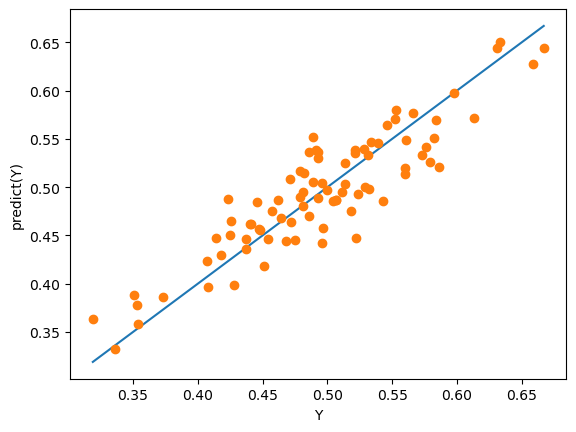

In [14]:
# step4_7
predict = model.predict(X)
plt.plot(np.linspace(min(Y),max(Y)),
         np.linspace(min(Y),max(Y)))
plt.plot(Y, predict, 'o')

plt.xlabel('Y')
plt.ylabel('predict(Y)')
plt.show()

In [15]:
# step4_8_セ
c_lst = ["阪神","広島","DeNA","巨人","ﾔｸﾙﾄ","中日"]
v_df1 = v_df.drop('本/試', axis=1)
v_df2 = v_df1.drop("盗/試", axis=1)
v_lst = v_df2.values.tolist()
#print(v_lst)
w_rate = []
for i in range(6):
    predic = {"得/試":[v_lst[i][1]],"失/試":[v_lst[i][2]],"打率":[v_lst[i][3]],"防御率":[v_lst[i][4]]}

    predf = pd.DataFrame(predic)
    xx = predf.iloc[:,0:4]
    yy = model.predict(xx)
    vle = yy[0]
    vle = round(vle,3)
    w_rate.append(vle)
   
jyuni = pd.Series(w_rate, index = c_lst)

jyuni = jyuni.sort_values(ascending=False)
print(jyuni)

阪神      0.603
DeNA    0.522
巨人      0.513
広島      0.494
ﾔｸﾙﾄ    0.474
中日      0.426
dtype: float64
